In [ ]:
# Exibir tempo de execução
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00
time: 281 µs (started: 2023-06-03 21:32:42 +00:00)


In [ ]:
# Import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as plt
from time import sleep

time: 353 ms (started: 2023-06-03 21:32:42 +00:00)


In [ ]:
# Carregamento dos datasets
IMDB_MAIN_URL = "https://datasets.imdbws.com"


time: 521 µs (started: 2023-06-03 21:32:42 +00:00)


In [ ]:
# Load akas database

import random
p = 0.5 # Get 50% of dataset, pois se pegar tudo o colab não aguenta
akas = pd.read_csv(f"{IMDB_MAIN_URL}/title.akas.tsv.gz", sep='\t',
                   skiprows=lambda i: i>0 and random.random() > p)

print(f"Size: {akas.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {akas.titleId.count()} rows")

#akas.head()

<ipython-input-4-1b807a7b415d>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv(f"{IMDB_MAIN_URL}/title.akas.tsv.gz", sep='\t',


Size: 1101.2044067382812 MB
Size: 18042131 rows
time: 1min 17s (started: 2023-06-03 21:32:42 +00:00)


In [ ]:
# Load basics database

basics = pd.read_csv(f"{IMDB_MAIN_URL}/title.basics.tsv.gz", sep='\t',low_memory=False)
basics['titleId'] = basics['tconst'] 

print(f"Size: {basics.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {basics.titleId.count()} rows")
#basics.head()

Size: 755.3448944091797 MB
Size: 9900455 rows
time: 44 s (started: 2023-06-03 21:34:00 +00:00)


In [ ]:
# Load Ratings database

ratings = pd.read_csv(f"{IMDB_MAIN_URL}/title.ratings.tsv.gz", sep='\t',low_memory=False)
ratings['titleId'] = ratings['tconst']

print(f"Size: {ratings.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {ratings.titleId.count()} rows")
#ratings.head()


Size: 40.216278076171875 MB
Size: 1317803 rows
time: 1.52 s (started: 2023-06-03 21:34:44 +00:00)


In [ ]:
df = pd.merge(akas, ratings, how="inner", on='titleId')
del akas
del ratings
df = pd.merge(df, basics, how="inner", on='titleId')
del basics
import gc
gc.collect()

0

time: 34.6 s (started: 2023-06-03 21:34:45 +00:00)


In [ ]:
print(f"Size: {df.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {df.titleId.count()} rows")
df['startYear_date'] = pd.to_datetime(df['startYear'], errors='coerce', format="%Y")

df.head()


Size: 348.50159454345703 MB
Size: 2175181 rows


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst_x,averageRating,...,tconst_y,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,startYear_date
0,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0,tt0000001,5.7,...,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1894-01-01
1,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,tt0000002,5.8,...,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",1892-01-01
2,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0,tt0000002,5.8,...,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",1892-01-01
3,tt0000002,3,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0,tt0000002,5.8,...,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",1892-01-01
4,tt0000003,1,Sarmanul Pierrot,RO,\N,imdbDisplay,\N,0,tt0000003,6.5,...,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",1892-01-01


time: 1.27 s (started: 2023-06-03 21:35:20 +00:00)


Text(0.5, 1.0, 'averageRating')

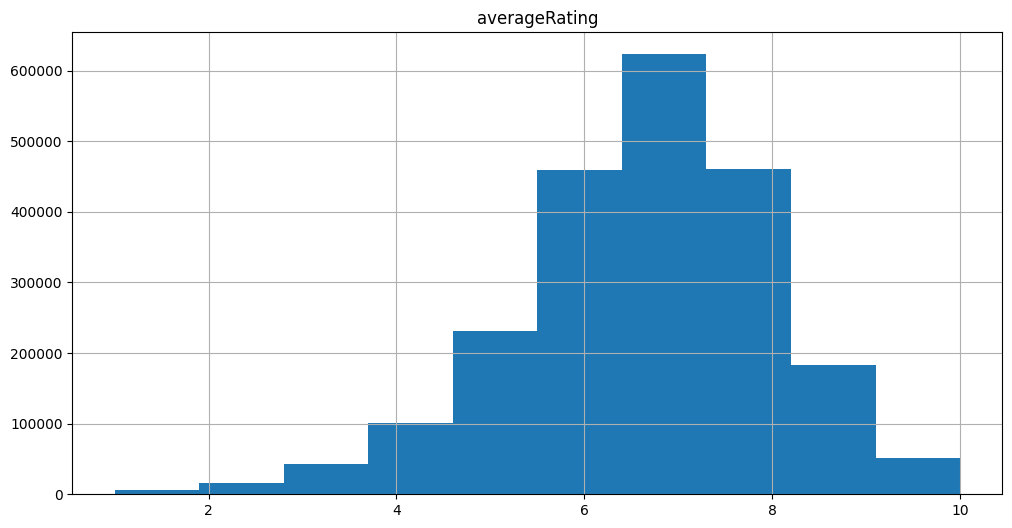

time: 365 ms (started: 2023-06-03 21:35:21 +00:00)


In [ ]:
# Ratings

fig, axs = plt.pyplot.subplots(1,1,figsize=(12,6))

# averageRating
df.averageRating.hist(ax=axs)
axs.set_title('averageRating')



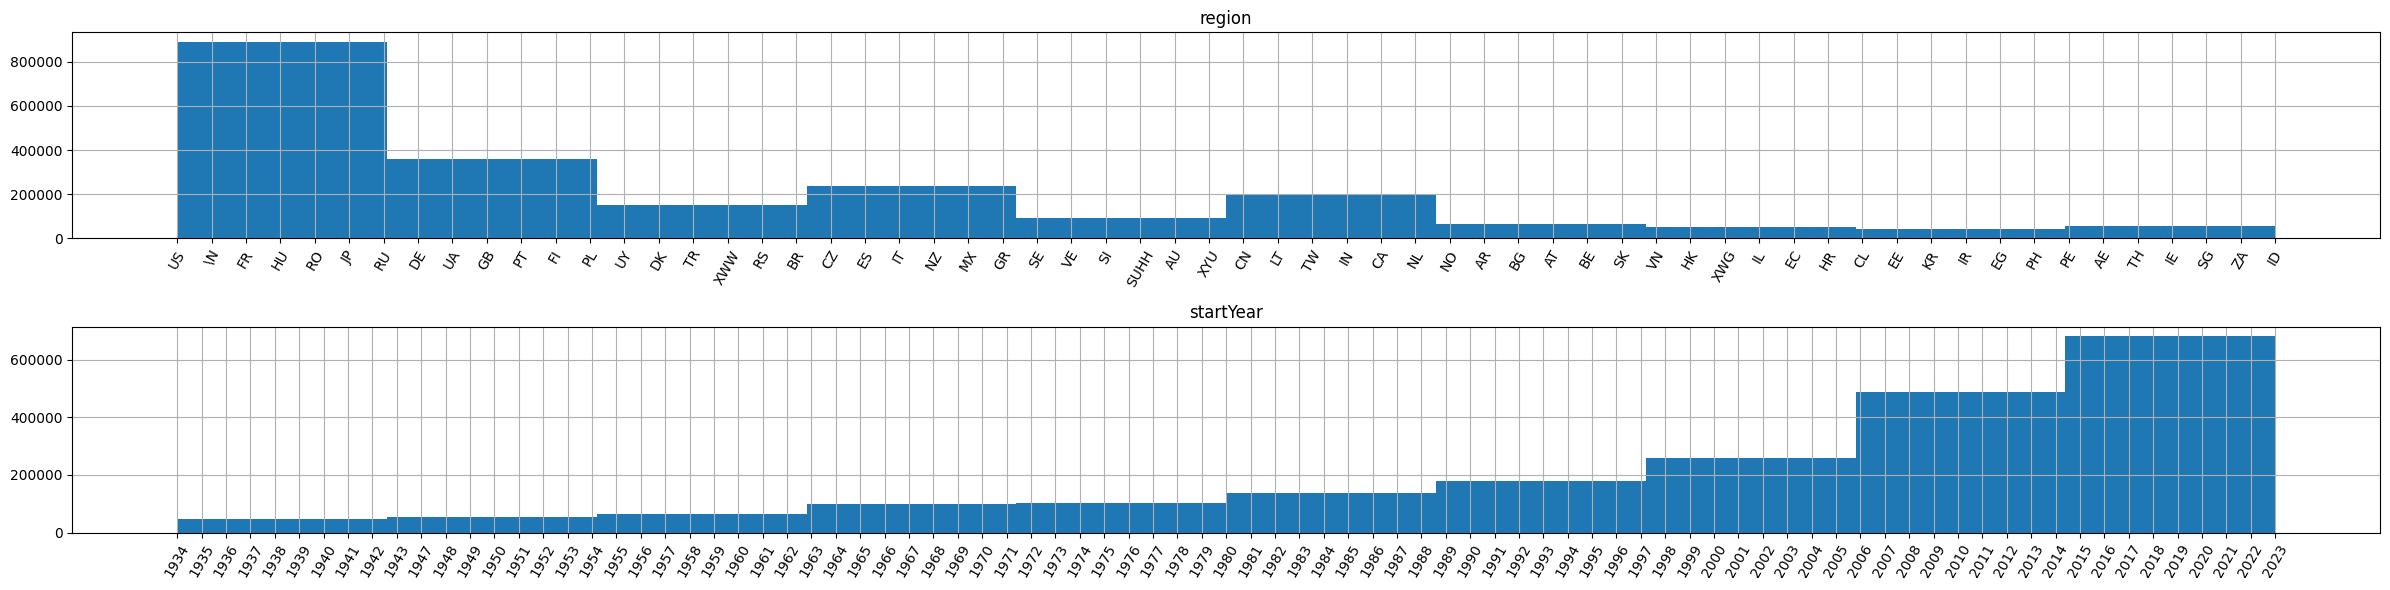

time: 8.68 s (started: 2023-06-03 21:35:21 +00:00)


In [ ]:

fig, axs = plt.pyplot.subplots(2,1,figsize=(24,6))



# get regions with more than 30% of mean records
countries = df.region.value_counts() > df.region.value_counts().mean() * 0.3
countries = countries[countries].index.values

# region
df.region[df.region.isin(countries)].hist(ax=axs[0], xrot=60)
axs[0].set_title('region')



# get year with more than 30% of mean records
years = df.startYear.value_counts() > df.startYear.value_counts().mean() * 0.3
years = years[years].index.values

# startYear
a = df.sort_values(by='startYear').startYear[df.startYear.isin(years)].hist(ax=axs[1], xrot=60)
axs[1].set_title('startYear')


fig.tight_layout()

In [ ]:
ten = df.loc[(df['startYear']>'1990') & (df['titleType']=='movie')]

ten = ten.assign(genres=df['genres'].str.split(',')).explode('genres')

#ten.head(10)

time: 9.44 s (started: 2023-06-03 21:35:30 +00:00)


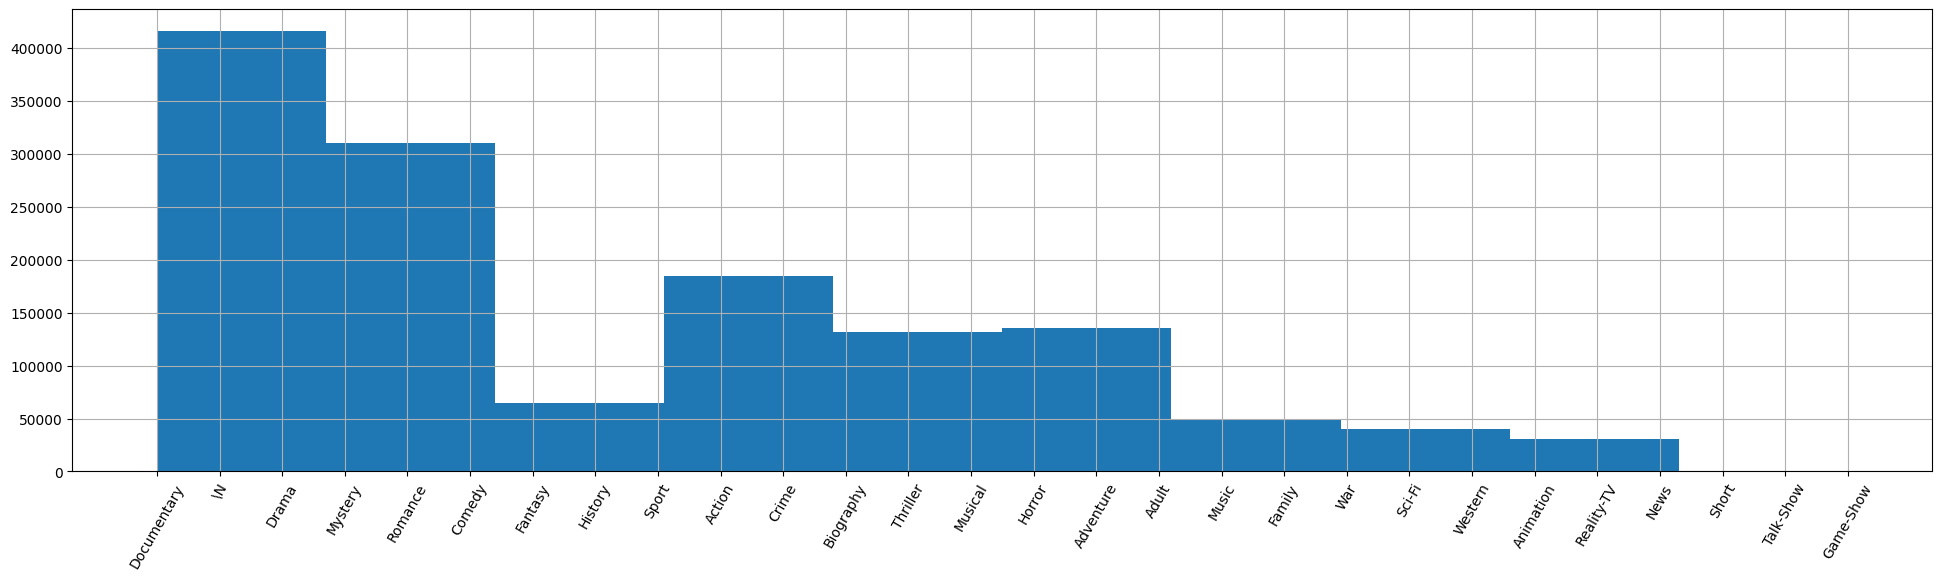

time: 1.56 s (started: 2023-06-03 21:35:40 +00:00)


In [ ]:
fig, axs = plt.pyplot.subplots(1,1,figsize=(24,6))

ten.genres.hist(xrot=60)
plt.pyplot.show()

## Analises possiveis:

- Olhar o numero de producoes de generos por ano para ver impacto de eventos históricos grandes (11/09, pandemia, guerra com ucrania, ChatGPT)


- Observer diversificacao de paises, generos (plotar a quuantidade de producoes por ano) - talvez unir países tipo EUA x países asíaticos + india x europa


- Procurar bases diferentes - entender se o maior investimento por genero reflete no maior consumo


- Relacionar o crescimento de filmes com indicadores de crescimento de cada país (enda, pib ou escolaridade)

- Relacionar algo com premiacoes

- tem sites com fotografias das bases com o tempo - talvez tenha ratings por ano e a gnt consiga explorar a nota por ano

- Entender os impactos das plataformas de streaming



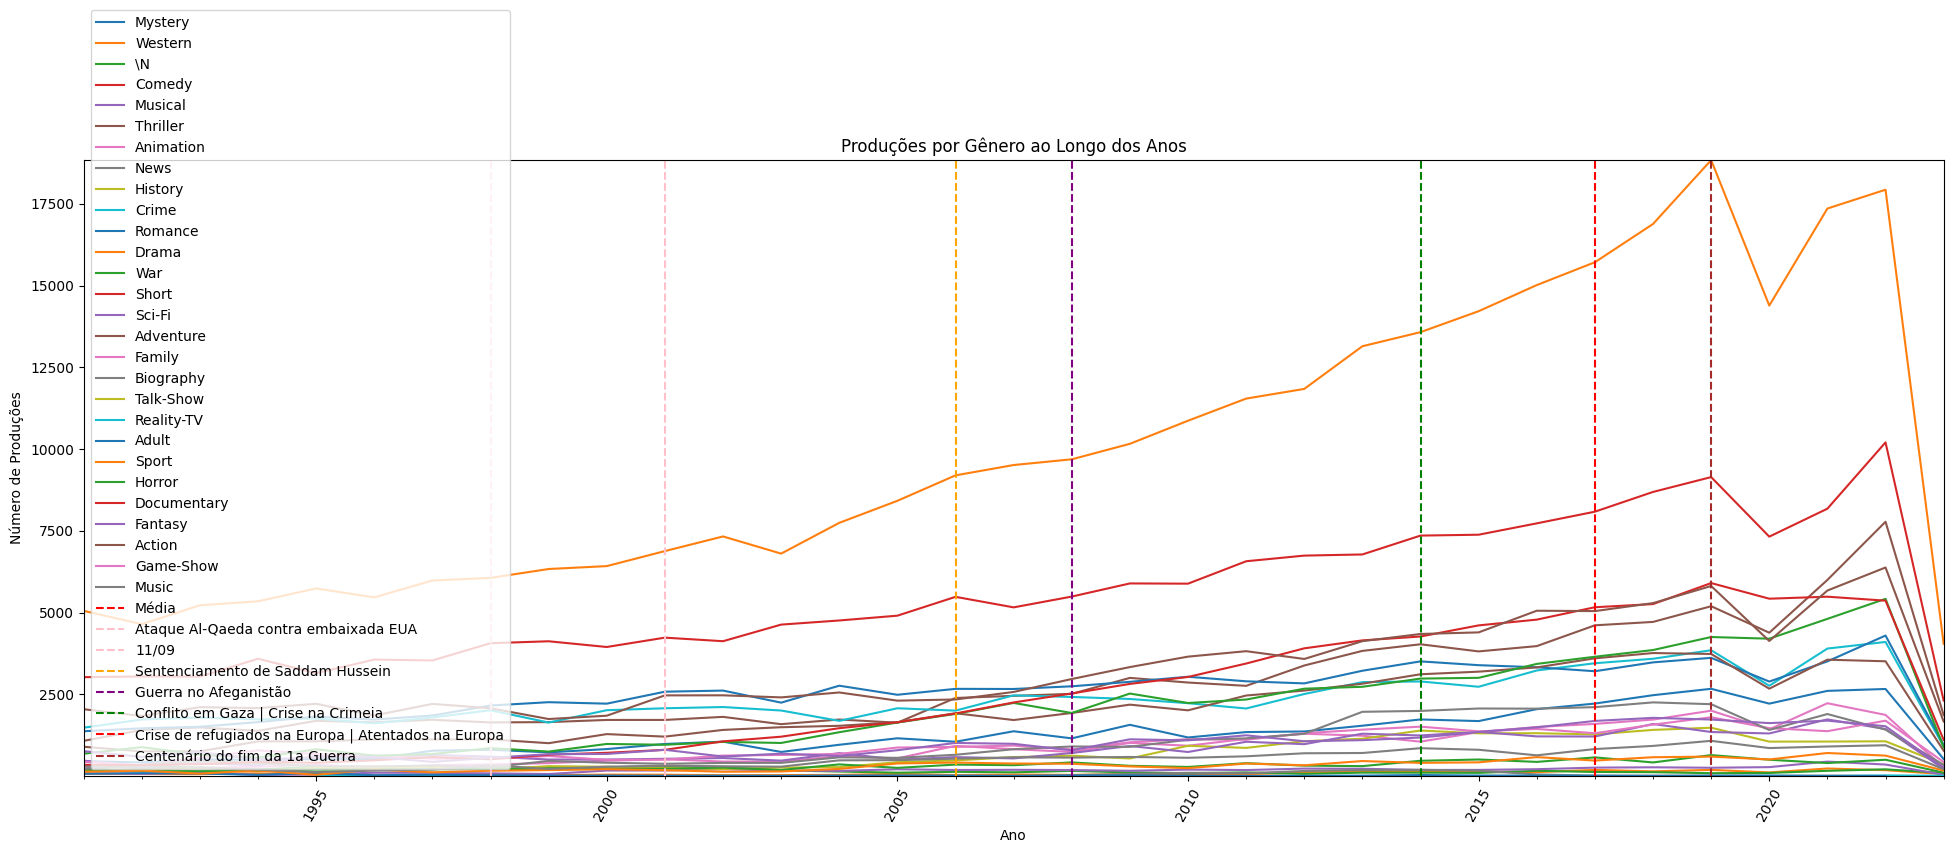

time: 18.9 s (started: 2023-06-03 21:52:37 +00:00)


In [ ]:
import datetime
# Olhar o numero de producoes de generos por ano para ver impacto de eventos históricos grandes (11/09, pandemia, guerra com ucrania, ChatGPT)
import math

# Extrair os gêneros únicos
unique_genres = set(ten['genres'].str.split(',').explode())

# Criar uma figura vazia
fig, ax = plt.pyplot.subplots(figsize=(24,8))

# Para cada gênero, criar uma linha separada no gráfico
ymin = math.inf
ymax = 0
for genre in unique_genres:
    genre_df = ten[ten['genres'] == genre]
    genre_df.groupby('startYear_date').size().plot(ax=ax, label=genre)
    genre_df.groupby('startYear_date').size()
    ymin = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() < ymin else ymin
    ymax = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() > ymax else ymax


# Linha para numero de producoes por ano
mean_df = ten.groupby('startYear_date').size().mean()
ax.plot(mean_df, label="Média", color='red', linestyle='--')

# Configurar os rótulos do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Produções')
ax.set_title('Produções por Gênero ao Longo dos Anos')
plt.pyplot.xticks(rotation=60)
ax.set_ylim([ymin, ymax])



# Linhar verticais
plt.pyplot.axvline(x=datetime.datetime(1998,1,1), label="Ataque Al-Qaeda contra embaixada EUA", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2001,1,1), label="11/09", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2006,1,1), label="Sentenciamento de Saddam Hussein", color='orange', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2008,1,1), label="Guerra no Afeganistão", color='purple', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2014,1,1), label="Conflito em Gaza | Crise na Crimeia", color='green', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2017,1,1), label="Crise de refugiados na Europa | Atentados na Europa", color='red', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2019,1,1), label="Centenário do fim da 1a Guerra", color='brown', linestyle='--')


# Exibir o gráfico
ax.legend()
# plt.pyplot.tight_layout()
plt.pyplot.show()


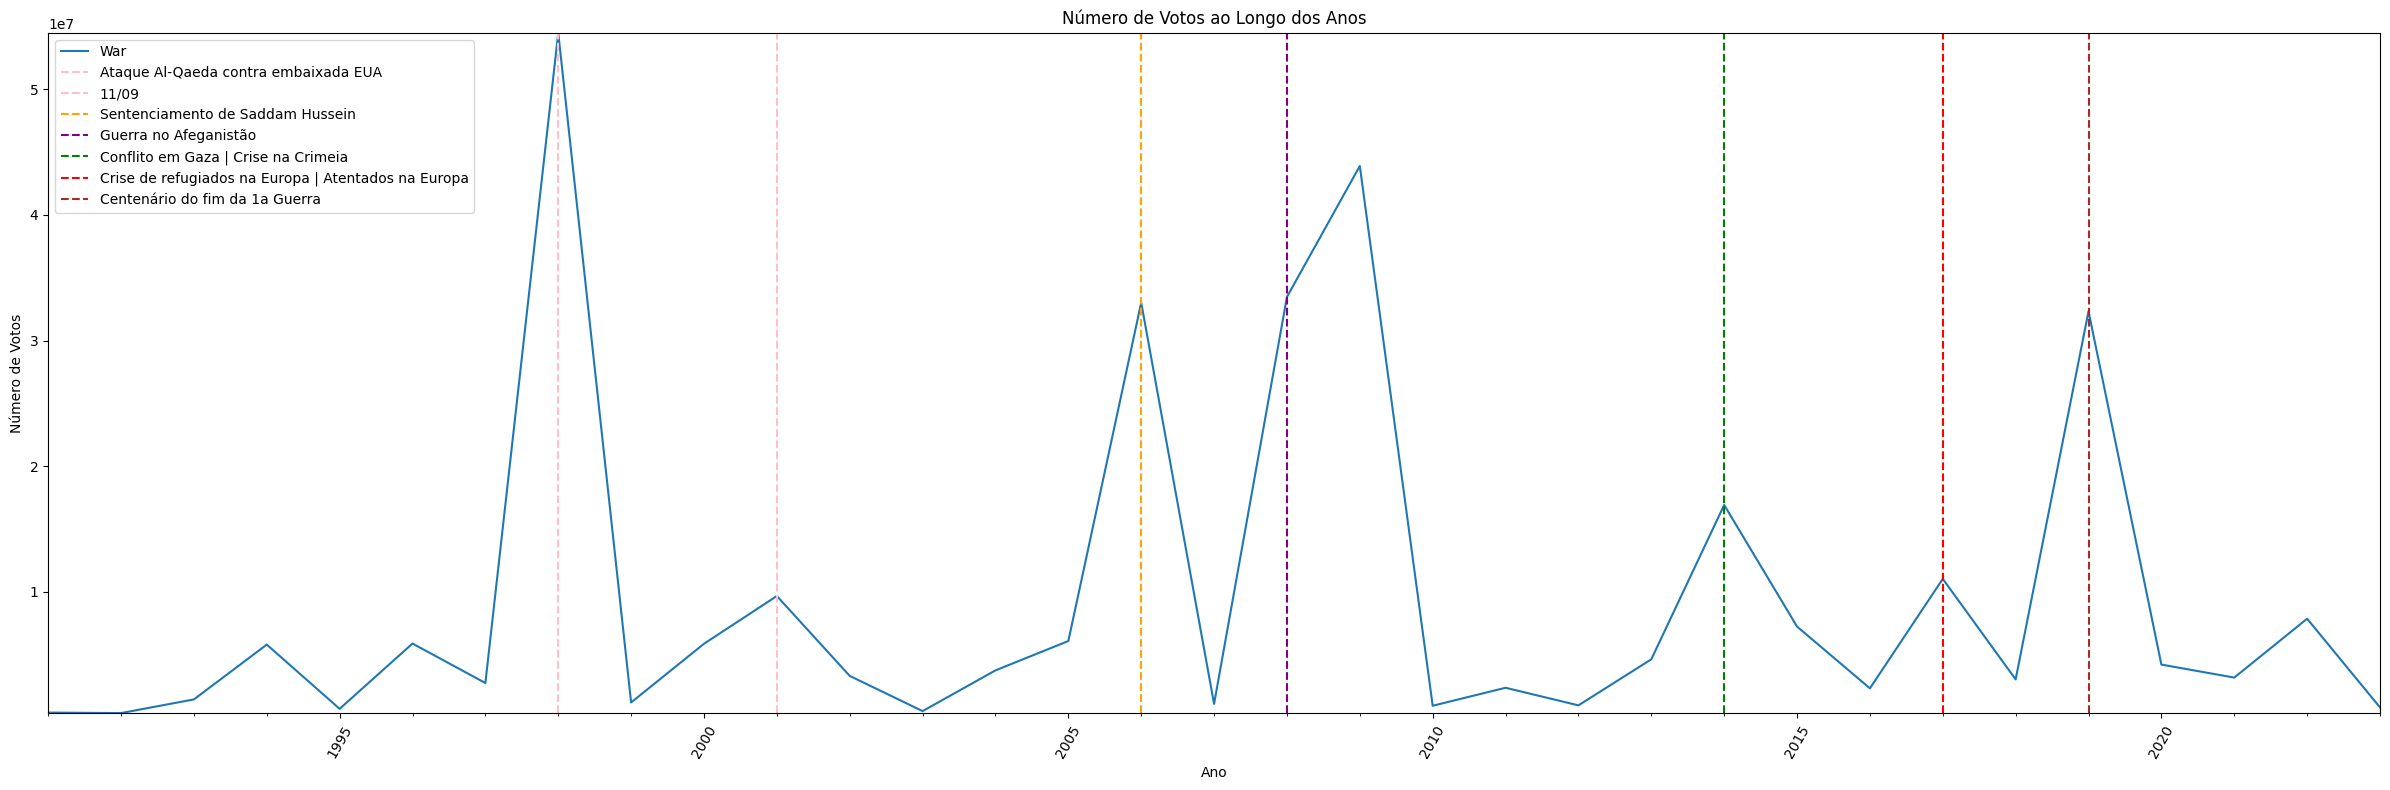

time: 1.21 s (started: 2023-06-03 21:35:59 +00:00)


In [ ]:


import datetime
# Olhar o numero de producoes de generos por ano para ver impacto de eventos históricos grandes (11/09, pandemia, guerra com ucrania, ChatGPT)
import math

# Extrair os gêneros únicos
unique_genres = ['War']
# Criar uma figura vazia
fig, ax = plt.pyplot.subplots(figsize=(24,8))

# Para cada gênero, criar uma linha separada no gráfico
ymin = math.inf
ymax = 0
for genre in unique_genres:
    genre_df = ten[ten['genres'] == genre]
    genre_df.groupby('startYear_date')['numVotes'].sum().plot(ax=ax, label=genre)
    genre_df.groupby('startYear_date').size()
    ymin = ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().min() if ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().min() < ymin else ymin
    ymax = ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().max() if ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().max() > ymax else ymax


# Configurar os rótulos do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Votos')
ax.set_title('Número de Votos ao Longo dos Anos')
plt.pyplot.xticks(rotation=60)
ax.set_ylim([ymin, ymax])



# Linhar verticais
plt.pyplot.axvline(x=datetime.datetime(1998,1,1), label="Ataque Al-Qaeda contra embaixada EUA", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2001,1,1), label="11/09", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2006,1,1), label="Sentenciamento de Saddam Hussein", color='orange', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2008,1,1), label="Guerra no Afeganistão", color='purple', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2014,1,1), label="Conflito em Gaza | Crise na Crimeia", color='green', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2017,1,1), label="Crise de refugiados na Europa | Atentados na Europa", color='red', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2019,1,1), label="Centenário do fim da 1a Guerra", color='brown', linestyle='--')

ax.legend()

# Exibir o gráfico
plt.pyplot.tight_layout()
plt.pyplot.show()


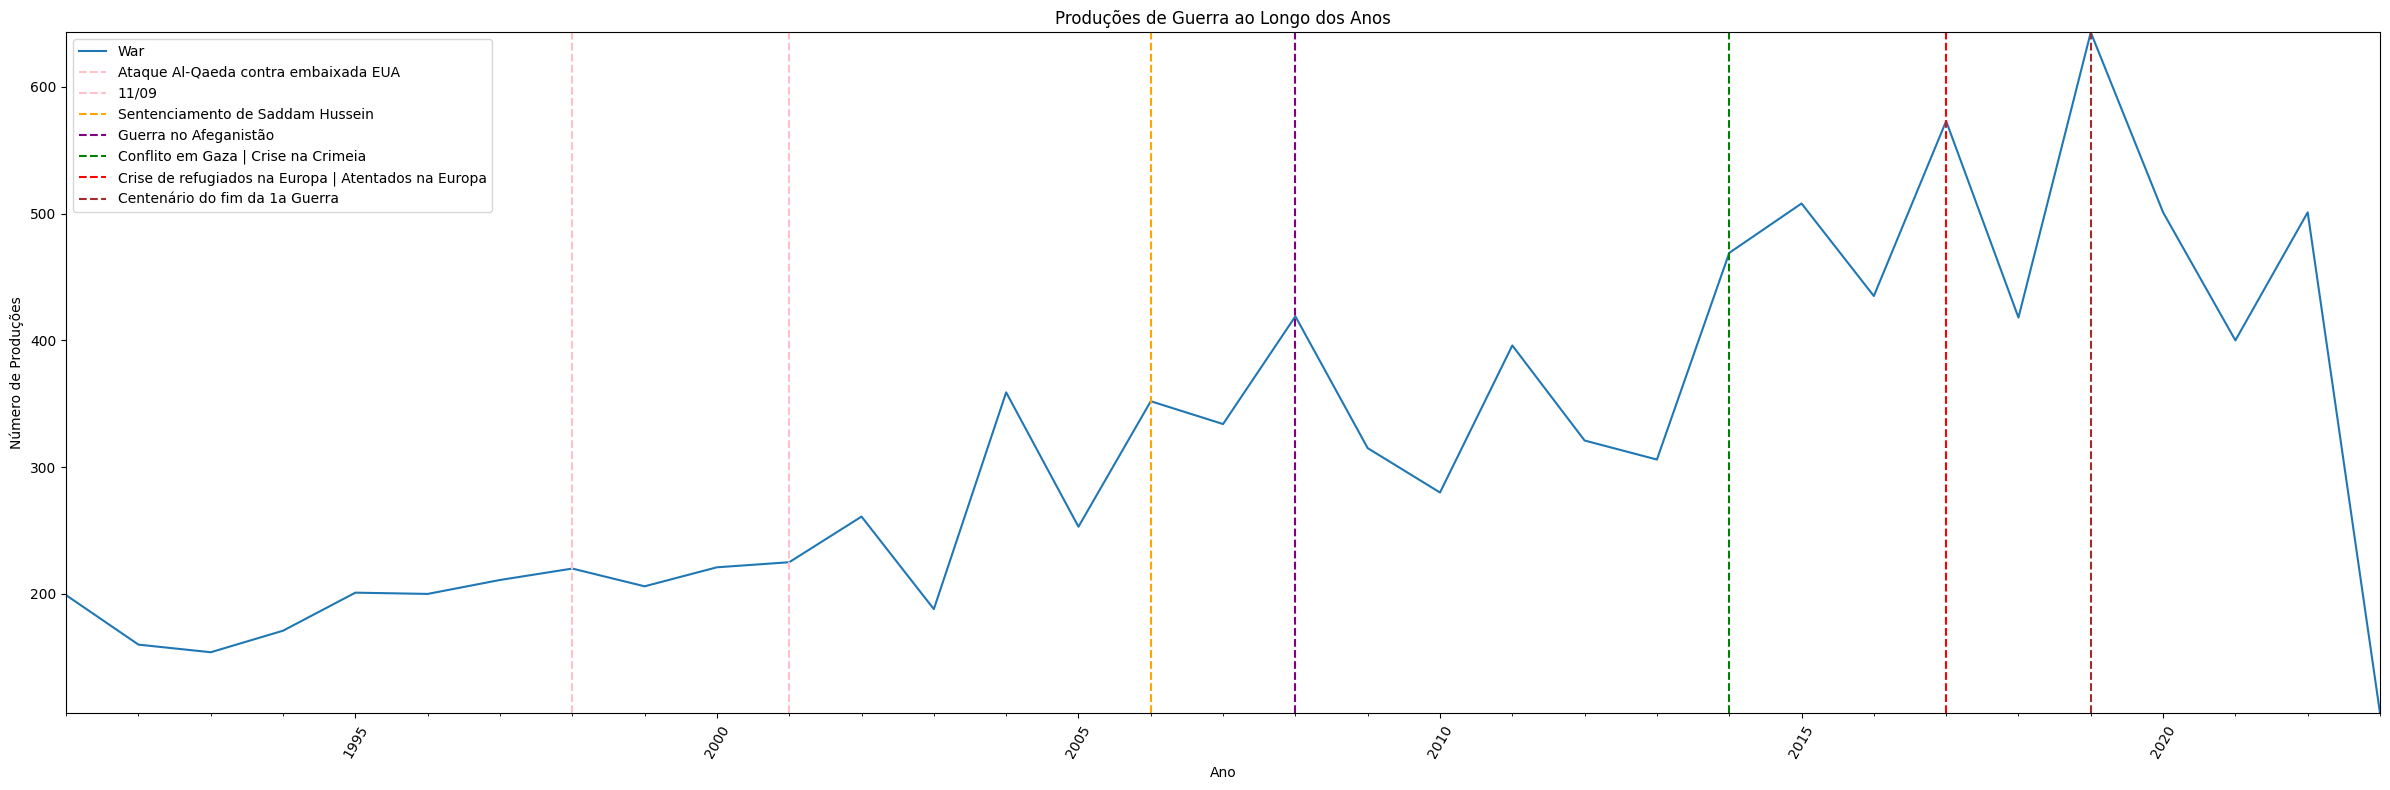

time: 1.32 s (started: 2023-06-03 21:47:49 +00:00)


In [ ]:
import datetime
# Olhar o numero de producoes de generos por ano para ver impacto de eventos históricos grandes (11/09, pandemia, guerra com ucrania, ChatGPT)
import math

# Extrair os gêneros únicos
unique_genres = ['War']
# Criar uma figura vazia
fig, ax = plt.pyplot.subplots(figsize=(24,8))

# Para cada gênero, criar uma linha separada no gráfico
ymin = math.inf
ymax = 0
for genre in unique_genres:
    genre_df = ten[ten['genres'] == genre]
    genre_df.groupby('startYear_date').size().plot(ax=ax, label=genre)
    genre_df.groupby('startYear_date').size()
    ymin = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() < ymin else ymin
    ymax = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() > ymax else ymax


# Configurar os rótulos do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Produções')
ax.set_title('Produções de Guerra ao Longo dos Anos')
plt.pyplot.xticks(rotation=60)
ax.set_ylim([ymin, ymax])



# Linhar verticais
plt.pyplot.axvline(x=datetime.datetime(1998,1,1), label="Ataque Al-Qaeda contra embaixada EUA", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2001,1,1), label="11/09", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2006,1,1), label="Sentenciamento de Saddam Hussein", color='orange', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2008,1,1), label="Guerra no Afeganistão", color='purple', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2014,1,1), label="Conflito em Gaza | Crise na Crimeia", color='green', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2017,1,1), label="Crise de refugiados na Europa | Atentados na Europa", color='red', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2019,1,1), label="Centenário do fim da 1a Guerra", color='brown', linestyle='--')

ax.legend()

# Exibir o gráfico
plt.pyplot.tight_layout()
plt.pyplot.show()
